In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [54]:
files = list(filter(lambda x: x.endswith('.csv'), os.listdir()))

In [55]:
reservoir_sizes = [int(i.split('_')[1][1:].split('x')[0]) for i in files]
files = [files[i] for i in list(np.argsort(reservoir_sizes))]
reservoir_sizes = np.sort(reservoir_sizes)

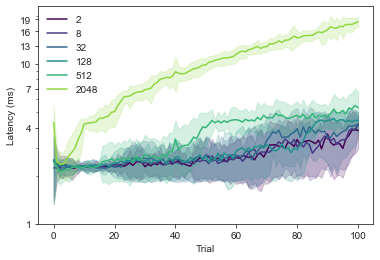

In [81]:
sns.set_style("ticks")
for i in range(len(files)):
    data = np.loadtxt(files[i], delimiter=',')*1000
    # print(files[i], data.shape)
    plt.plot(np.mean(data, axis=0), label=str(reservoir_sizes[i]), color=plt.cm.viridis(i/len(files)))
    plt.fill_between(np.arange(data.shape[1]), np.mean(data, axis=0) - np.std(data, axis=0),
                        np.mean(data, axis=0) + np.std(data, axis=0), alpha=0.2, color=plt.cm.viridis(i/len(files)))
plt.yscale('log')
plt.yticks(np.arange(1, 20, 3),np.arange(1, 20, 3))
plt.xlabel('Trial')
plt.ylabel('Latency (ms)')
plt.grid(False)
plt.legend(frameon=False)
plt.show()
